In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium import Map, CircleMarker


In [43]:
# Load the dataset
data = pd.read_csv('Dataset .csv')
data


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


Dataset Shape: (9551, 21)
Missing Values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


C:\Users\ashis\AppData\Local\Temp\ipykernel_17784\2110506967.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cuisines'].fillna("Unknown", inplace=True)


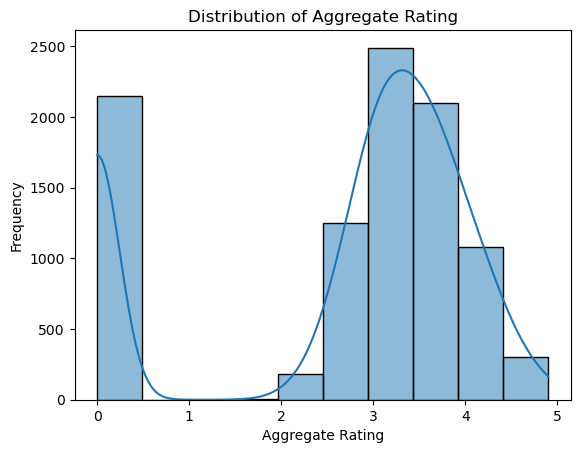

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [45]:
# Task 1: Explore the dataset
print("Dataset Shape:", data.shape)  # Number of rows and columns
print("Missing Values:\n", data.isnull().sum())  # Missing values

# Handle missing values
data['Cuisines'].fillna("Unknown", inplace=True)

# Data type conversion if necessary
data['Price range'] = data['Price range'].astype('category')

# Analyze the target variable
sns.histplot(data['Aggregate rating'], bins=10, kde=True)
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

# Check for class imbalance
print(data['Aggregate rating'].value_counts())

In [46]:
# Task 2: Basic statistics for numerical columns
print(data.describe())

# Distribution of categorical variables
print("Country Code Distribution:\n", data['Country Code'].value_counts())
print("City Distribution:\n", data['City'].value_counts())
print("Cuisines Distribution:\n", data['Cuisines'].value_counts())

# Top cities and cuisines
top_cities = data['City'].value_counts().head(10)
top_cuisines = data['Cuisines'].value_counts().head(10)
print("Top Cities:\n", top_cities)
print("Top Cuisines:\n", top_cuisines)


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Aggregate rating         Votes  
count           9551.000000       9551.000000   9551.000000  
mean            1199.210763          2.666370    156.909748  
std            16121.183073          1.516378    430.169145  
min                0.000000          0.000000      0.000000  
25%              250.000000          2.500000      5.000000  
50%              400.000000          3.200000     3

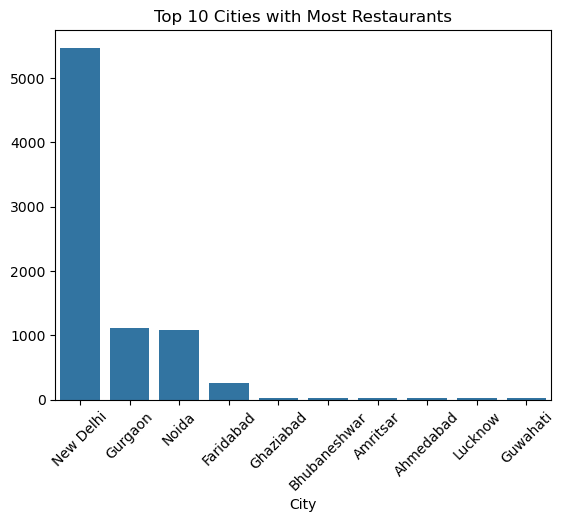

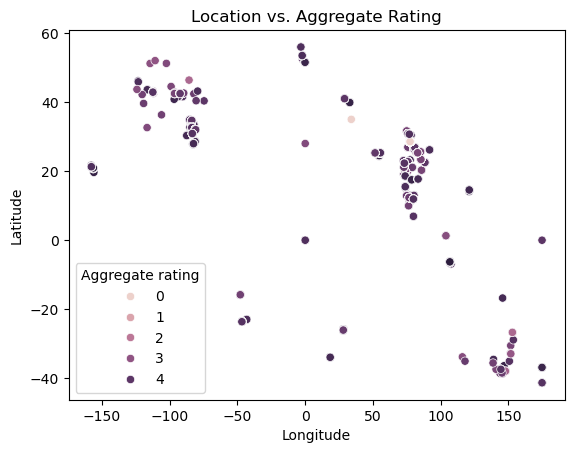

In [48]:
import folium

# Task 3: Visualize restaurant locations
m = Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=2)

for idx, row in data.iterrows():
    CircleMarker(location=[row['Latitude'], row['Longitude']],
                 radius=1, color='blue').add_to(m)

m.save("restaurant_locations.html")  # Open this file to see the map

# Distribution of restaurants across cities or countries
city_dist = data['City'].value_counts()
sns.barplot(x=city_dist.index[:10], y=city_dist.values[:10])
plt.title("Top 10 Cities with Most Restaurants")
plt.xticks(rotation=45)
plt.show()

# Correlation between location and rating
sns.scatterplot(x=data['Longitude'], y=data['Latitude'], hue=data['Aggregate rating'])
plt.title("Location vs. Aggregate Rating")
plt.show()


Table Booking Percentage:
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64
Online Delivery Percentage:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


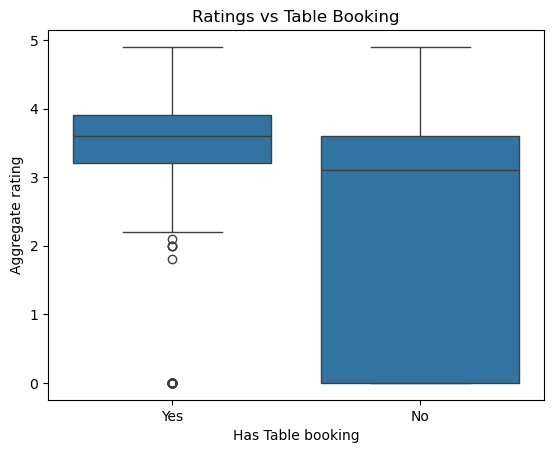

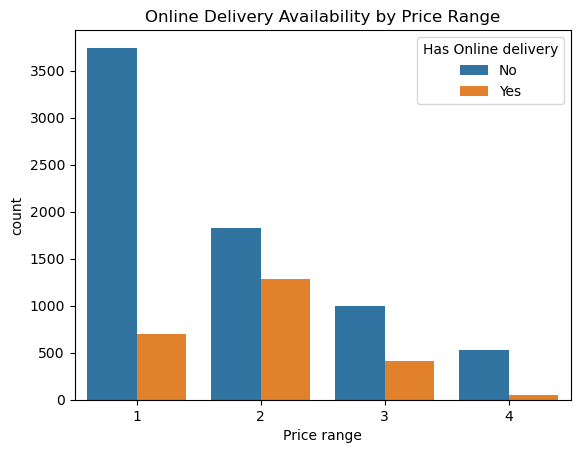

In [50]:
# Task 1: Table booking and online delivery
table_booking = data['Has Table booking'].value_counts(normalize=True) * 100
online_delivery = data['Has Online delivery'].value_counts(normalize=True) * 100

print("Table Booking Percentage:\n", table_booking)
print("Online Delivery Percentage:\n", online_delivery)

# Compare ratings with and without table booking
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=data)
plt.title("Ratings vs Table Booking")
plt.show()

# Online delivery by price range
sns.countplot(x='Price range', hue='Has Online delivery', data=data)
plt.title("Online Delivery Availability by Price Range")
plt.show()



In [51]:
# Task 2: Price range analysis
common_price_range = data['Price range'].value_counts()
print("Most Common Price Range:\n", common_price_range)

avg_rating_by_price = data.groupby('Price range')['Aggregate rating'].mean()
print("Average Rating by Price Range:\n", avg_rating_by_price)

rating_color_by_price = data.groupby('Price range')['Rating color'].apply(lambda x: x.mode()[0])
print("Rating Colors by Price Range:\n", rating_color_by_price)


Most Common Price Range:
 Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64
Average Rating by Price Range:
 Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
Rating Colors by Price Range:
 Price range
1    Orange
2    Orange
3    Yellow
4    Yellow
Name: Rating color, dtype: object


C:\Users\ashis\AppData\Local\Temp\ipykernel_17784\1032997046.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_price = data.groupby('Price range')['Aggregate rating'].mean()
C:\Users\ashis\AppData\Local\Temp\ipykernel_17784\1032997046.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_color_by_price = data.groupby('Price range')['Rating color'].apply(lambda x: x.mode()[0])


In [52]:
# Task 3: Feature engineering
data['Name Length'] = data['Restaurant Name'].apply(len)
data['Has Table Booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
data['Has Online Delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})
print(data[['Name Length', 'Has Table Booking', 'Has Online Delivery']].head())


   Name Length  Has Table Booking  Has Online Delivery
0           16                  1                    0
1           16                  1                    0
2           22                  1                    0
3            4                  0                    0
4           11                  1                    0


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Task 1: Predictive Modeling
features = ['Price range', 'Votes', 'Has Table Booking', 'Has Online Delivery', 'Name Length']
X = data[features]
y = data['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R^2 Score:", r2_score(y_test, y_pred_lr))

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree R^2 Score:", r2_score(y_test, y_pred_dt))

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))

Linear Regression R^2 Score: 0.2645631770677763
Decision Tree R^2 Score: 0.895284598346503
Random Forest R^2 Score: 0.9377586142404947


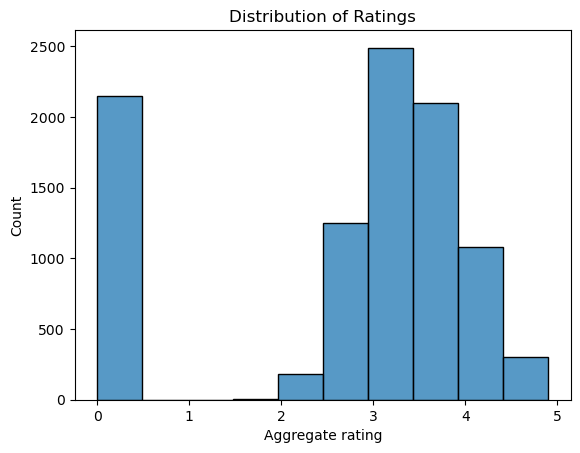

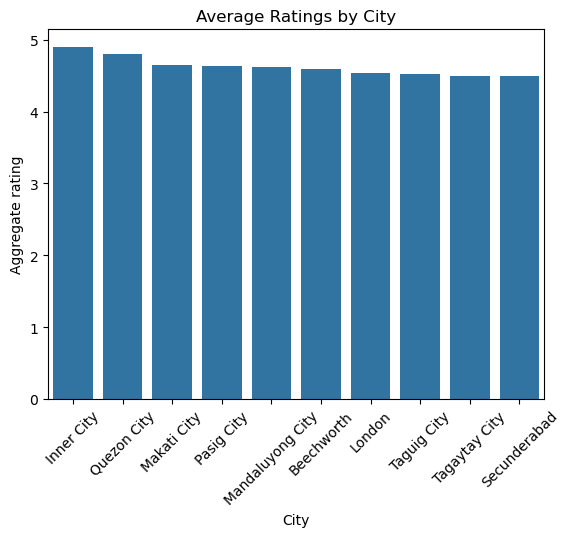

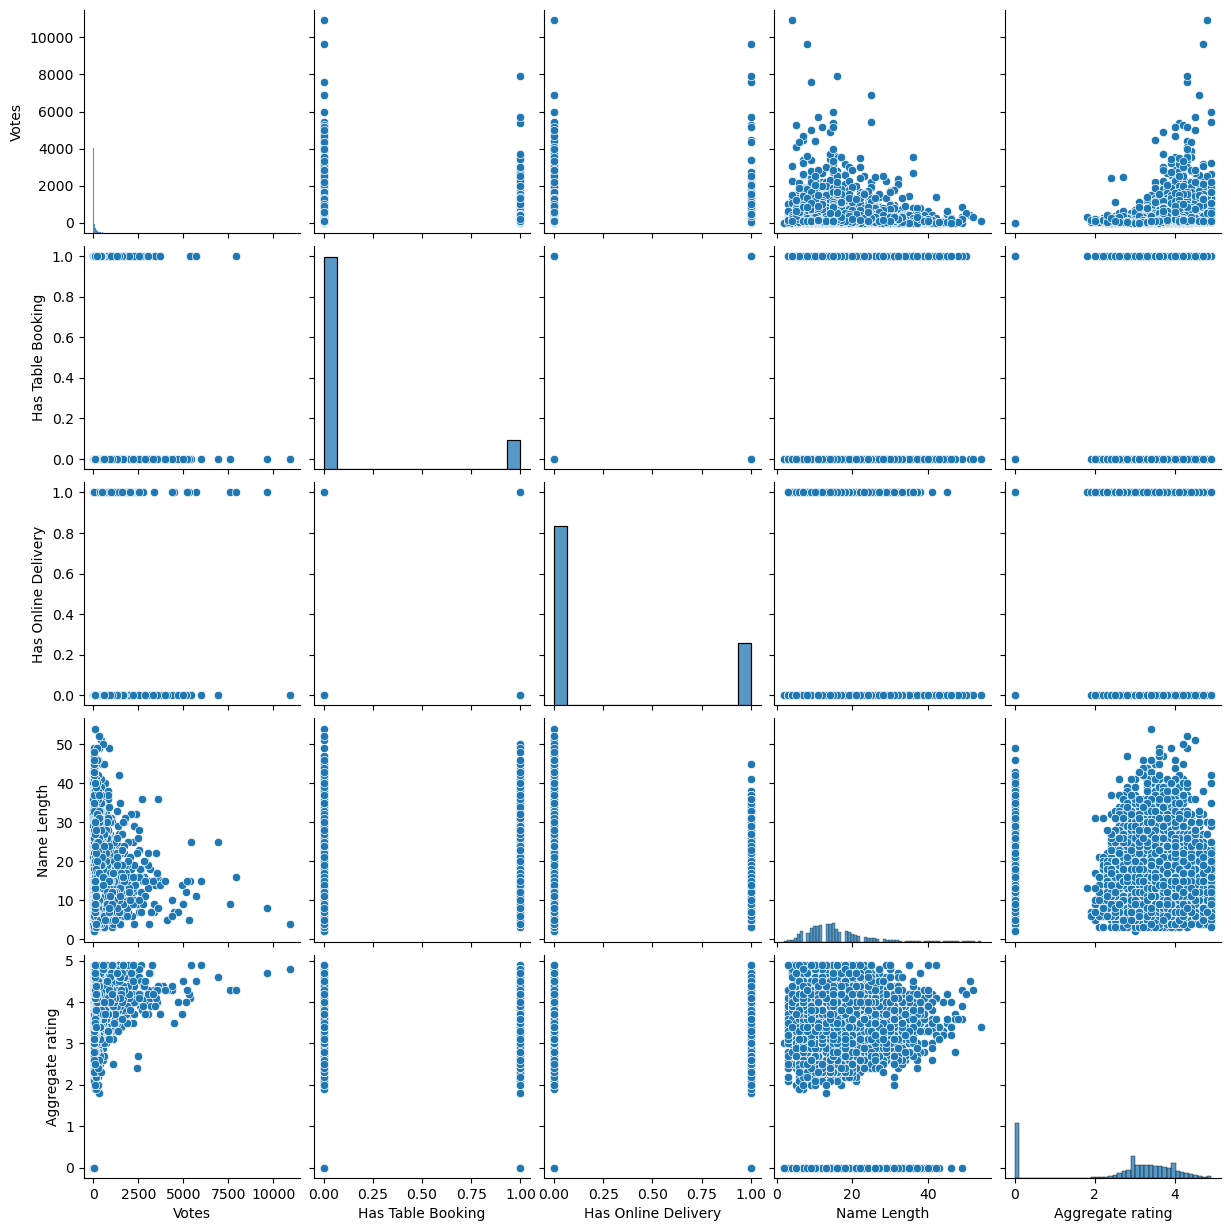

In [56]:
# Task 3: Data visualization
sns.histplot(data['Aggregate rating'], bins=10)
plt.title("Distribution of Ratings")
plt.show()

sns.barplot(x='City', y='Aggregate rating', data=data.groupby('City')['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating', ascending=False).head(10))
plt.title("Average Ratings by City")
plt.xticks(rotation=45)
plt.show()

sns.pairplot(data[features + ['Aggregate rating']])
plt.show()
